### Imports

In [18]:
import pandas as pd
import numpy as np
import time
from datetime import timedelta, datetime
from sklearn.decomposition import LatentDirichletAllocation

### Reading in the data

In [19]:
data = pd.read_csv("verb_verb_df.csv", index_col=0)

In [20]:
data.head()

,olema,saama,hakkama,tegema,pidama,võima,teadma,ütlema,võtma,maksma,...,chillima,tartuma,irnuma,indutseerima,kategoriseerima,lohkuda-eemaldama,portima,pingima,shellima,kumuleeruma
olema,88780,15838,3867,15221,13144,8397,3830,11929,8215,3418,...,0,0,0,0,0,0,0,0,0,0
saama,74807,9155,30256,6187,20701,21872,20913,7636,3278,2030,...,0,0,0,0,0,0,0,0,0,0
teadma,43634,10185,2588,7105,7853,2385,3279,6165,2192,1041,...,0,0,0,0,0,0,0,0,0,0
tegema,78994,36424,2563,7191,24594,19587,2347,8139,3996,1255,...,0,3,0,0,0,0,3,3,0,0
tahtma,13467,16501,3450,14238,1929,667,8170,13738,5335,1512,...,0,0,0,0,0,0,0,0,0,0


### Optimizing LDA

In [21]:
print(str(timedelta(seconds=time.time()+7200)).split(", ")[1])
start = datetime.now()

models = {}
perplexities = {}

for n in range(100, 1001, 100):
    model = LatentDirichletAllocation(n_components=n, random_state=0)
    model.fit(data)
    perplexity = model.perplexity(data)
    print(f"Model with {n} topics fitted and perplexity found at {str(timedelta(seconds=time.time()+7200)).split(', ')[1]}.")
    models[n] = model
    perplexities[n] = perplexity
            
print(str(timedelta(seconds=time.time()+7200)).split(", ")[1])
print(datetime.now()-start)

22:15:38.097229
Model with 100 topics fitted and perplexity found at 22:16:39.113829.
Model with 200 topics fitted and perplexity found at 22:17:56.917524.
Model with 300 topics fitted and perplexity found at 22:19:39.305415.
Model with 400 topics fitted and perplexity found at 22:22:43.180630.
Model with 500 topics fitted and perplexity found at 22:26:30.955090.
Model with 600 topics fitted and perplexity found at 22:31:05.686069.
Model with 700 topics fitted and perplexity found at 22:36:14.675042.
Model with 800 topics fitted and perplexity found at 22:42:47.289436.
Model with 900 topics fitted and perplexity found at 22:50:04.111137.
Model with 1000 topics fitted and perplexity found at 22:58:14.230134.
22:58:14.231134
0:42:36.134896


In [22]:
perplexities

{100: 136.39515643573208,
 200: 136.21409103966369,
 300: 136.7338047556775,
 400: 137.37154037980756,
 500: 137.533649250998,
 600: 137.96494262690615,
 700: 138.44884799307792,
 800: 138.6643806937124,
 900: 139.13754731504068,
 1000: 139.58871834828213}

In [23]:
from matplotlib import pyplot as plt

Text(0, 0.5, 'Perplexity')

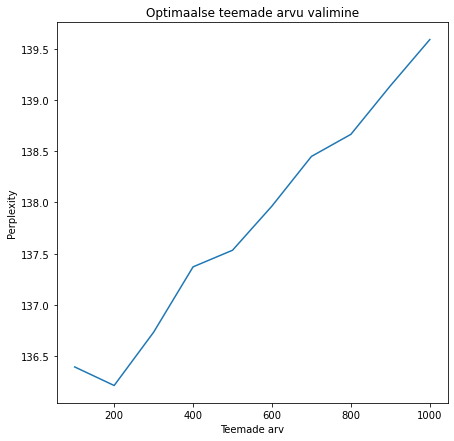

In [24]:
plt.figure(figsize=(7, 7))

plt.plot(list(range(100, 1001, 100)), perplexities.values())

plt.title("Optimaalse teemade arvu valimine")
plt.xlabel("Teemade arv")
plt.ylabel("Perplexity")